In [1]:
import pandas as pd
import numpy as np
import scipy as sp

In [2]:
datos = pd.read_excel('datos_socioeconomicos_ingresantes.xlsx',skiprows=[0,1] )

In [3]:
columnas = ['nombre_carrera', 'sexo', 'obra_social', 'madre_trabajo', 'madre_vive', 'padre_trabajo', 
            'padre_vive', 'trabajo', 'horas_sem_trabajo', 'padre_ult_est_curs', 
            'madre_ult_est_curs', 'nota_matematica', 'matcursprisem','cantmataprob_al_21-10-2017',
            'dep_practica', 'idioma_ingles', 'idioma_franc', 'idioma_portu', 'idioma_itali', 'idioma_aleman']

In [4]:
datos = datos[columnas]

    nombre_carrera= se tranformó a código numérico - sin Nans
    sexo= se binarizó - sin Nans
    matcursprisem= se transformó a números - sin Nans
    cantmataprob...= se transformó a números - sin Nans

    obra_social= vectorización(binario) - 9 Nans
    madre_trabajo= vectorización(binario) - 492 Nans
    padre_trabajo= vectorización(binario) - 590 Nans
    trabajo= vectorización(binario) - 5 Nans

    horas_sem_trabajo= vectorización(binario) - 2199 Nans

    madre_vive= binarización - 4 Nans
    padre_vive= binarización - 5 Nans
    padre_ult_est_curs= vectorización - 7 Nans
    madre_ult_est_curs= vectorización - 5 Nans
    dep_practica= binarización 1 Nan
    idioma_ingles = 0, 1, 2 (categórica ordinal) - sin Nans

    nota_matematica = 1088 Nans 

Tratamiento de los nulos:

 - Se eliminan los nulos de 'madre_vive','padre_vive','padre_ult_est_curs','madre_ult_est_curs', 'dep_practica','trabajo', 'obra_social'
 - Para las variables madre_trabajo y padre_trabajo, se transforman los nulos en la categoría Desconoce.
 - Para la variable nota_matemática, se transforman los nulos en no aprobados.
 - La variable cantidad de horas de trabajo tiene 56 nulos que se corresponden con la categoría:"trabajó al menos una hora" de la variable trabajo (eso es el 10% de la población total que trabaja). Por otro lado, todos los que tienen un valor en la variable "horas de trabajo" pertenecen a la categoría "trabajó al menos una hora", así que eso es coherente.  

#### Sacar los nulls de columnas: madre_vive, padre_vive, padre_ult_est_curs, madre_ult_est_curs y dep_practica, trabajo, obra social

In [5]:
datos_null = datos.dropna(subset=['madre_vive','padre_vive','padre_ult_est_curs','madre_ult_est_curs',
                                  'dep_practica','trabajo', 'obra_social'])

#### Transformar nota matematica a 1(aprobado) 0 (no aprobado)

In [6]:
def trans_matem(val):
    if val=="A":
        return(1)
    return(0)

In [7]:
datos_null.nota_matematica=datos_null.nota_matematica.apply(trans_matem)

/home/carla/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


#### Transformar categorías de estudios padre madre en números.

In [8]:
#definir números para las categorías. Es el agrupamiento que hacen en el anuario UNC
def from_estudio_s(value):
    if 'de postgrado' in value.lower():
        #return 'postgrado'
        return 4
    if 'universitarios completos' in value.lower():
        #return 'univ_completos'
        return 4
    if 'universitarios incompletos' in value.lower():
        #return 'univ_incompleto'
        return 4
    if 'superiores completos' in value.lower():
        #return 'sup_completo'
        return 4
    if 'superiores incompletos' in value.lower():
        #return 'sup_incompleto'
        return 4
    if 'secundarios completos' in value.lower():
        #return 'sec_completo'
        return 3
    if 'secundarios incompletos' in value.lower() or 'primarios completos' in value.lower():
        #return 'primario_completo-sec_inc'
        return 2
    if 'primarios incompletos' in value.lower() or 'no hizo estudios' in value.lower():
        #return 'primario_inc-sin_estudios'
        return 1
    #return 'Desconoce'
    return 0

In [9]:
#definir números para las categorías. Es el agrupamiento que hacen en el anuario UNC
def from_estudio(value):
    if 'de postgrado' in value.lower():
        #return 'postgrado'
        return 8
    if 'universitarios completos' in value.lower():
        #return 'univ_completos'
        return 7
    if 'universitarios incompletos' in value.lower():
        #return 'univ_incompleto'
        return 6
    if 'superiores completos' in value.lower():
        #return 'sup_completo'
        return 5
    if 'superiores incompletos' in value.lower():
        #return 'sup_incompleto'
        return 4
    if 'secundarios completos' in value.lower():
        #return 'sec_completo'
        return 3
    if 'secundarios incompletos' in value.lower() or 'primarios completos' in value.lower():
        #return 'primario_completo-sec_inc'
        return 2
    if 'primarios incompletos' in value.lower() or 'no hizo estudios' in value.lower():
        #return 'primario_inc-sin_estudios'
        return 1
    #return 'Desconoce'
    return 0

In [10]:
def add_col(data, col_ori, col_nva, transf):
    data.loc[data.index, col_nva] = data[col_ori].apply(transf)

In [11]:
add_col(datos_null, "padre_ult_est_curs", "estudios_padre", from_estudio)
add_col(datos_null, "madre_ult_est_curs", "estudios_madre", from_estudio)

add_col(datos_null, "padre_ult_est_curs", "estudios_padre_s", from_estudio_s)
add_col(datos_null, "madre_ult_est_curs", "estudios_madre_s", from_estudio_s)

/home/carla/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/carla/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [12]:
# binarizamos nivel de estudios con una cantidad de categorías reducida: primaria incompleta; 
#primaria completa/sec incompleta; sec completa; superiores comp/incomp univ compl/inc o postgrado

nv_estudios_madre_s = pd.get_dummies(datos_null.estudios_madre_s, prefix='niv_est_madre', prefix_sep='_')
datos_null = pd.merge(datos_null, nv_estudios_madre_s, left_index=True, right_index=True)
nv_estudios_padre_s = pd.get_dummies(datos_null.estudios_padre_s, prefix='niv_est_padre', prefix_sep='_')
datos_null = pd.merge(datos_null, nv_estudios_padre_s, left_index=True, right_index=True)

#### Transformar categorías de idiomas en enteros

In [13]:
def from_idioma(value):
    if 'Muy bueno' in value:
        return 3
    if 'Bueno' in value:
        return 2
    if 'Básico' in value:
        return 1
    return 0

In [14]:
datos_null.loc[datos_null.index, 'idioma_ingles'] = datos_null.loc[
                                                    datos_null.index, 'idioma_ingles'].apply(from_idioma)

#### Construir variables binarias con las categorías de 'trabajo'

In [15]:
col_trabajo = pd.get_dummies(datos_null.trabajo, prefix='alm', prefix_sep='_')

In [16]:
datos_null = pd.merge(datos_null, col_trabajo, left_index=True, right_index=True)

In [17]:
datos_null.madre_trabajo = datos_null.madre_trabajo.fillna('Desconoce')
datos_null.padre_trabajo = datos_null.padre_trabajo.fillna('Desconoce')

In [18]:
col_trabajo_madre = pd.get_dummies(datos_null.madre_trabajo, prefix='madre', prefix_sep='_')

In [19]:
col_trabajo_padre = pd.get_dummies(datos_null.padre_trabajo, prefix='padre', prefix_sep='_')

In [20]:
datos_null = pd.merge(datos_null, col_trabajo_madre, left_index=True, right_index=True)

In [21]:
datos_null = pd.merge(datos_null, col_trabajo_padre, left_index=True, right_index=True)

#### Construir variable binaria con obra social

In [22]:
col_obrasocial = pd.get_dummies(datos_null.obra_social)

In [23]:
datos_null = pd.merge(datos_null,col_obrasocial,left_index=True, right_index=True)

#### Construir variable binaria con horas semanales de trabajo

In [24]:
col_horastrabajo = pd.get_dummies(datos_null.horas_sem_trabajo, prefix='alm', prefix_sep='_')

In [25]:
datos_null = pd.merge(datos_null,col_horastrabajo,left_index=True, right_index=True) 

#### Binarizar variables SI NO

In [26]:
def trans_SN(val):
    if val=="S":
        return(1)
    if val=="N":
        return(0)
    return(0)

In [27]:
datos_null.dep_practica = datos_null.dep_practica.apply(trans_SN)

In [28]:
datos_null.madre_vive = datos_null.madre_vive.apply(trans_SN)

In [29]:
datos_null.padre_vive = datos_null.padre_vive.apply(trans_SN)

#### Transfomar string -> int

In [30]:
datos_null.loc[datos_null.index, 'sexo'] = pd.to_numeric(datos_null.loc[datos_null.index, 'sexo'])

In [31]:
datos_null.loc[datos_null.index, 'matcursprisem'] = pd.to_numeric(datos_null.loc[datos_null.index, 'matcursprisem'])

In [32]:
datos_null.loc[datos_null.index, 'cantmataprob_al_21-10-2017'] = pd.to_numeric(datos_null.loc[
               datos_null.index, 'cantmataprob_al_21-10-2017'])

#### Transformar carreras a variables numéricas

In [33]:
datos_null.nombre_carrera = pd.Categorical(datos_null.nombre_carrera)

In [34]:
datos_null.loc[ datos_null.index, 'cod_carrera'] = datos_null.nombre_carrera.cat.codes

In [35]:
_df = pd.DataFrame({'a': [1,2,3,4,5,6,7,8], 'b':[8,7,6,5,4,3,2,1]})

In [36]:
_df.apply(lambda x: x[0] + x[1], axis=1)

0    9
1    9
2    9
3    9
4    9
5    9
6    9
7    9
dtype: int64

#### Juntar otros idiomas (excluyendo ingles) y hacer categorías numéricas

In [37]:
datos_otros_idms = datos_null.loc[datos_null.index,['idioma_itali', 'idioma_franc', 'idioma_aleman', 'idioma_portu']]

In [38]:
def juntar_sel(l):
    lstring = ' '.join(l)
    if 'Muy bueno' in lstring:
        return 3
    if 'Bueno' in lstring:
        return 2
    if 'Básico' in lstring:
        return 1
    return 0

In [39]:
datos_null.loc[datos_null.index, 'otros_idms'] = datos_otros_idms.apply(juntar_sel, axis=1)

In [40]:
datos_null.otros_idms.value_counts()

0    2013
1     522
2     172
Name: otros_idms, dtype: int64

In [41]:
# binarizamos nivel de inglés generando tres variables, cada una por categoría de nivel de inglés
nv_ingles = pd.get_dummies(datos_null.idioma_ingles, prefix='niv_ingles', prefix_sep='_')
datos_null = pd.merge(datos_null, nv_ingles, left_index=True, right_index=True)

### Columnas que seleccionamos después de la exploración

In [42]:
cols_sel = [ 
      'nota_matematica',
      'madre_vive',
      'padre_vive',
      'alm_No trabajó y buscó trabajo en algún momento de los últimos 30 días',
      'alm_No trabajó y no buscó trabajo', 
      'alm_Trabajó al menos una hora',
      'madre_Desconoce',
      'madre_No trabajó y buscó trabajo en algún momento de los últimos 30 días',
      'madre_No trabajó y no buscó trabajo',
      'madre_Trabajó al menos una hora', 
      'padre_Desconoce',
      'padre_No trabajó y buscó trabajo en algún momento de los últimos 30 días',
      'padre_No trabajó y no buscó trabajo',
      'padre_Trabajó al menos una hora', 
      'Carece de Obra Social',
      'Como afiliado voluntario', 
      'Otorgada por la universidad',
      'Por ser familiar a cargo', 
      'Por su trabajo',
      'niv_est_madre_0',
      'niv_est_madre_1', 
      'niv_est_madre_2',
      'niv_est_madre_3', 
      'niv_est_madre_4', 
      'niv_est_padre_0',
      'niv_est_padre_1', 
      'niv_est_padre_2', 
      'niv_est_padre_3',
      'niv_est_padre_4', 
      'niv_ingles_0', 
      'niv_ingles_1', 
      'niv_ingles_2'
        ]

# sacamos las variables sexo, otros idiomas, dep_practica porque no vemos influencia en la variable dependiente
# y la carrera porque habría que reagrupar o segmentar para usarla en la regresión.

X_no = [ 'sexo', 'otros_idms', 'dep_practica', 'cod_carrera']

# usamos como y la nota de matemática pero vimos que se ven cosas muy similares con 
# 'matcursprisem' y 'cantmataprob_al_21-10-2017'.

#y = ['nota_matematica']

#cambiar el nombre de algunas columnas:
data_sel = datos_null[cols_sel]

dic_columnas = {'alm_No trabajó y buscó trabajo en algún momento de los últimos 30 días': 'alm_NoTr_B',
'alm_No trabajó y no buscó trabajo': 'alm_NoTr_NoB',
'alm_Trabajó al menos una hora': 'alm_Tr',
'madre_No trabajó y buscó trabajo en algún momento de los últimos 30 días': 'madre_NoTr_B',
'madre_No trabajó y no buscó trabajo': 'madre_NoTr_NoB',
'madre_Trabajó al menos una hora': 'madre_Tr',
'padre_No trabajó y buscó trabajo en algún momento de los últimos 30 días': 'padre_NoTr_B',
'padre_No trabajó y no buscó trabajo': 'padre_NoTr_NoB',
'padre_Trabajó al menos una hora': 'padre_Tr',
'Carece de Obra Social' : 'OS_sin',
'Como afiliado voluntario': 'OS_voluntario',
'Otorgada por la universidad': 'OS_univ',
'Por ser familiar a cargo': 'OS_familiar',
'Por su trabajo':  'OS_trabajo'}

data_sel.rename(columns=dic_columnas, inplace=True)
#data_sel

/home/carla/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [43]:
print(datos_null.columns)
print(data_sel.columns)

Index(['nombre_carrera', 'sexo', 'obra_social', 'madre_trabajo', 'madre_vive',
       'padre_trabajo', 'padre_vive', 'trabajo', 'horas_sem_trabajo',
       'padre_ult_est_curs', 'madre_ult_est_curs', 'nota_matematica',
       'matcursprisem', 'cantmataprob_al_21-10-2017', 'dep_practica',
       'idioma_ingles', 'idioma_franc', 'idioma_portu', 'idioma_itali',
       'idioma_aleman', 'estudios_padre', 'estudios_madre', 'estudios_padre_s',
       'estudios_madre_s', 'niv_est_madre_0', 'niv_est_madre_1',
       'niv_est_madre_2', 'niv_est_madre_3', 'niv_est_madre_4',
       'niv_est_padre_0', 'niv_est_padre_1', 'niv_est_padre_2',
       'niv_est_padre_3', 'niv_est_padre_4',
       'alm_No trabajó y buscó trabajo en algún momento de los últimos 30 días',
       'alm_No trabajó y no buscó trabajo', 'alm_Trabajó al menos una hora',
       'madre_Desconoce',
       'madre_No trabajó y buscó trabajo en algún momento de los últimos 30 días',
       'madre_No trabajó y no buscó trabajo',
       '

## EXPLORACION 

## Trabajo

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.barplot(x="trabajo", y="nota_matematica", data=datos_null)
plt.setp(ax.get_xticklabels(), rotation=20)
plt.show()
ax = sns.barplot(x="trabajo", y="matcursprisem", data=datos_null)
plt.setp(ax.get_xticklabels(), rotation=20)
plt.show()
ax = sns.barplot(x="trabajo", y="cantmataprob_al_21-10-2017", data=datos_null)
plt.setp(ax.get_xticklabels(), rotation=20)
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

Trabajo se correlaciona con cambios en la posibilidad de cumplir los objetivos de la carrera

## Estudios madre/padre

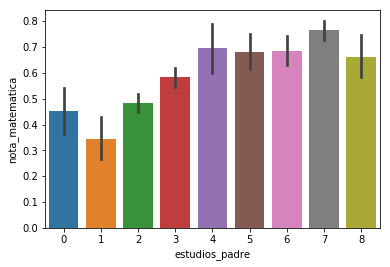

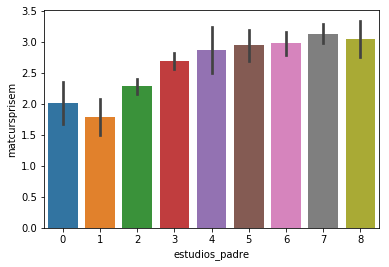

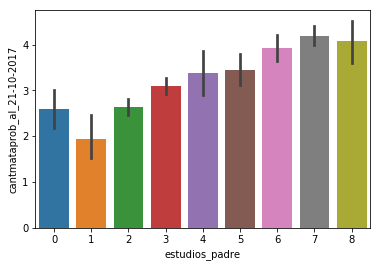

In [45]:
import seaborn as sns
ax = sns.barplot(x="estudios_padre", y="nota_matematica", data=datos_null)
plt.show()
ax = sns.barplot(x="estudios_padre", y="matcursprisem", data=datos_null)
plt.show()
ax = sns.barplot(x="estudios_padre", y="cantmataprob_al_21-10-2017", data=datos_null)
plt.show()

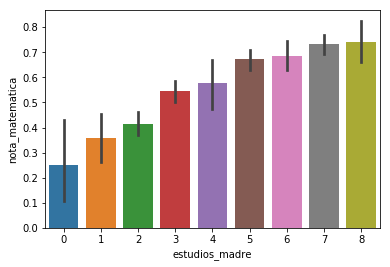

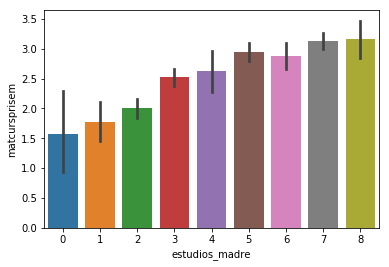

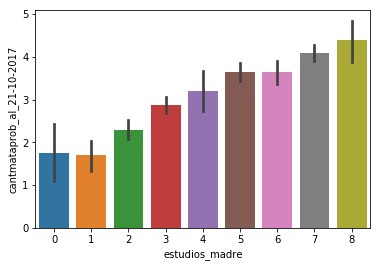

In [46]:
import seaborn as sns
ax = sns.barplot(x="estudios_madre", y="nota_matematica", data=datos_null)
plt.show()
ax = sns.barplot(x="estudios_madre", y="matcursprisem", data=datos_null)
plt.show()
ax = sns.barplot(x="estudios_madre", y="cantmataprob_al_21-10-2017", data=datos_null)
plt.show()

El nivel de estudios alcanzado por madre y padre se correlacionan con la posibilidad de cumplir los objetivos de la carrera

## sexo

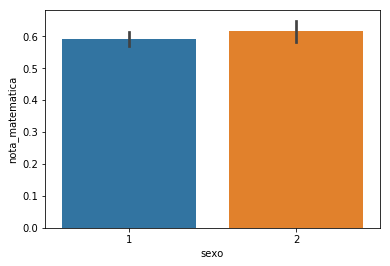

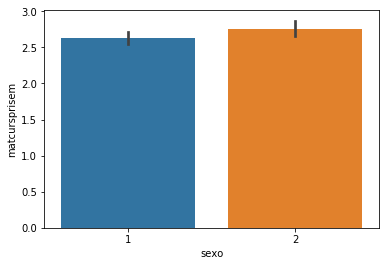

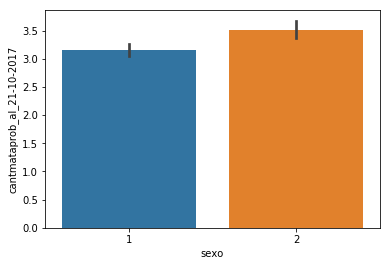

In [47]:
import seaborn as sns
ax = sns.barplot(x="sexo", y="nota_matematica", data=datos_null)
plt.show()
ax = sns.barplot(x="sexo", y="matcursprisem", data=datos_null)
plt.show()
ax = sns.barplot(x="sexo", y="cantmataprob_al_21-10-2017", data=datos_null)
plt.show()

El sexo no se correlaciona con la proporción que aprueba matemáticas, ni con la cantidad de materias cursadas. Hay una diferencia menor con la cantidad de materias aprobadas, pero habría que evaluar si eso se explica por diferencias en los planes de estudio de las carreras más elegidas para cada sexo

## madre_trabajo y padre_trabajo

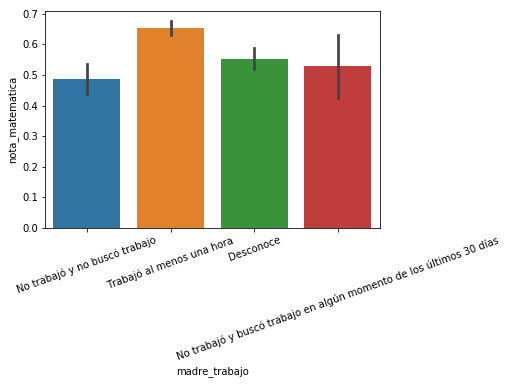

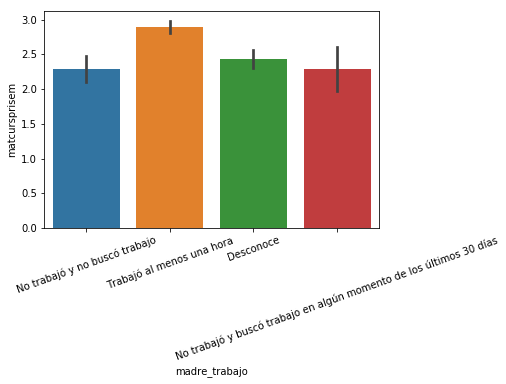

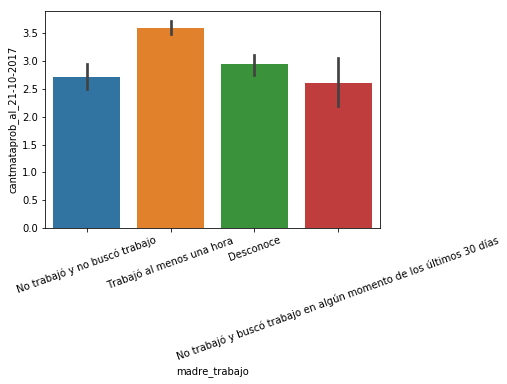

In [48]:
import seaborn as sns
ax = sns.barplot(x="madre_trabajo", y="nota_matematica", data=datos_null)
plt.setp(ax.get_xticklabels(), rotation=20)
plt.show()
ax = sns.barplot(x="madre_trabajo", y="matcursprisem", data=datos_null)
plt.setp(ax.get_xticklabels(), rotation=20)
plt.show()
ax = sns.barplot(x="madre_trabajo", y="cantmataprob_al_21-10-2017", data=datos_null)
plt.setp(ax.get_xticklabels(), rotation=20)
plt.show()

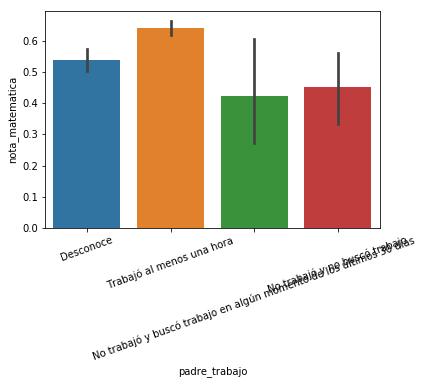

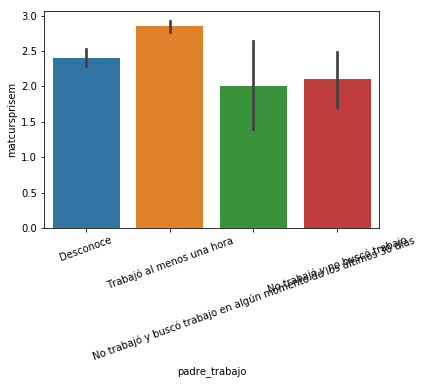

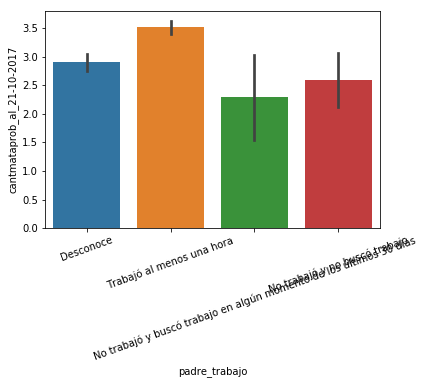

In [49]:
import seaborn as sns
ax = sns.barplot(x="padre_trabajo", y="nota_matematica", data=datos_null)
plt.setp(ax.get_xticklabels(), rotation=20)
plt.show()
ax = sns.barplot(x="padre_trabajo", y="matcursprisem", data=datos_null)
plt.setp(ax.get_xticklabels(), rotation=20)
plt.show()
ax = sns.barplot(x="padre_trabajo", y="cantmataprob_al_21-10-2017", data=datos_null)
plt.setp(ax.get_xticklabels(), rotation=20)
plt.show()

Que el padre y la madre trabajen se correlaciona con la posibilidad de cumplir los objetivos de la carrera.
Se podría generar otra variable que sea padre y madre trabajan, padre trabaja, madre trabaja, ninguno trabaja

## madre_vive padre_vive

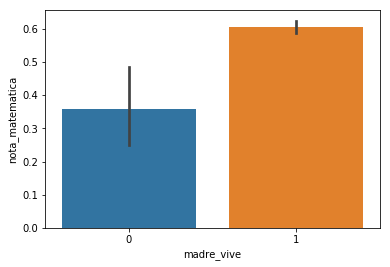

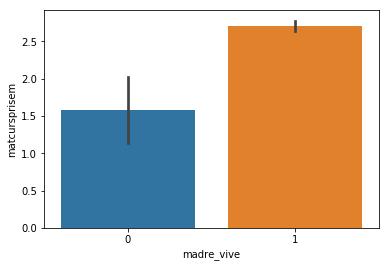

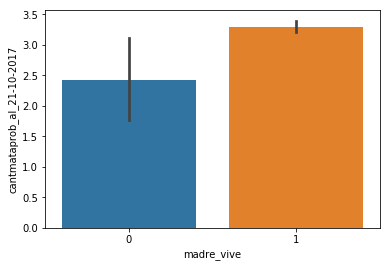

In [50]:
import seaborn as sns
ax = sns.barplot(x="madre_vive", y="nota_matematica", data=datos_null)
plt.show()
ax = sns.barplot(x="madre_vive", y="matcursprisem", data=datos_null)
plt.show()
ax = sns.barplot(x="madre_vive", y="cantmataprob_al_21-10-2017", data=datos_null)
plt.show()

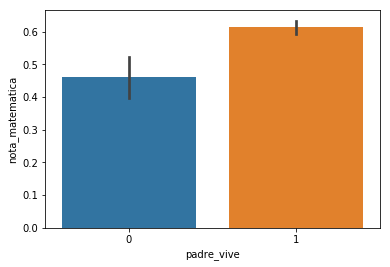

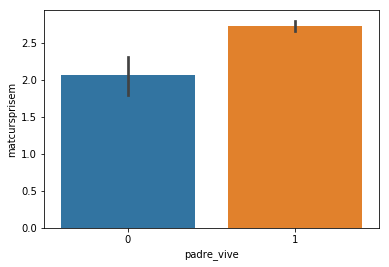

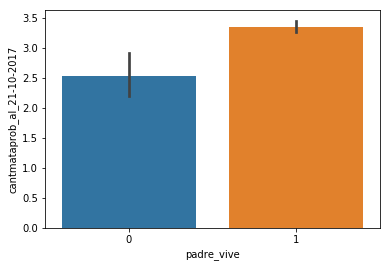

In [51]:
import seaborn as sns
ax = sns.barplot(x="padre_vive", y="nota_matematica", data=datos_null)
plt.show()
ax = sns.barplot(x="padre_vive", y="matcursprisem", data=datos_null)
plt.show()
ax = sns.barplot(x="padre_vive", y="cantmataprob_al_21-10-2017", data=datos_null)
plt.show()

Que su madre y padre estén vivos se correlaciona con la posibilidad de cumplir los objetivos de la carrera. También acá se podría generar una nueva variable con categorías:  madre y padre viven, padre vive, madre vive, ninguno está vivo

## obra_social

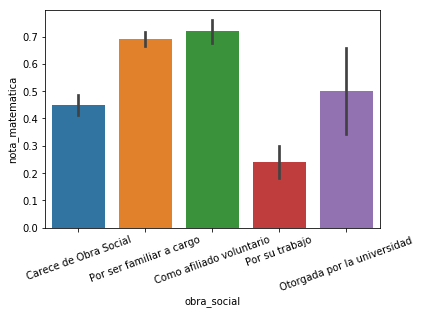

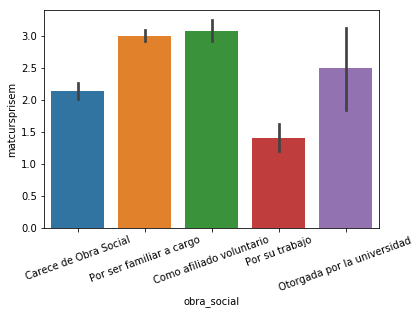

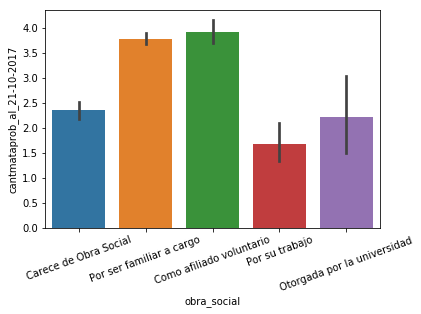

In [52]:
import seaborn as sns
ax = sns.barplot(x="obra_social", y="nota_matematica", data=datos_null)
plt.setp(ax.get_xticklabels(), rotation=20)
plt.show()
ax = sns.barplot(x="obra_social", y="matcursprisem", data=datos_null)
plt.setp(ax.get_xticklabels(), rotation=20)
plt.show()
ax = sns.barplot(x="obra_social", y="cantmataprob_al_21-10-2017", data=datos_null)
plt.setp(ax.get_xticklabels(), rotation=20)
plt.show()

La obra social se correlaciona con la posibilidad de cumplir los objetivos de la carrera. 

## dep_practica

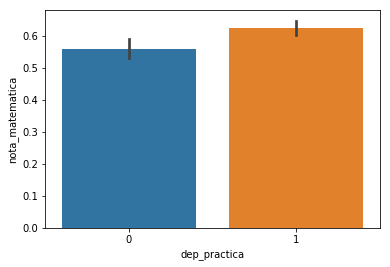

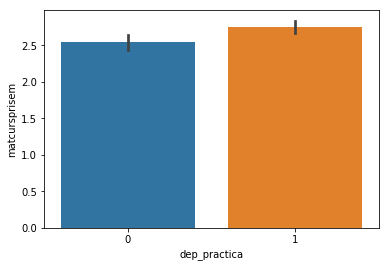

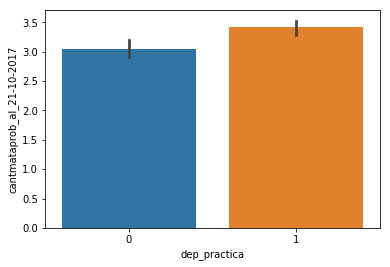

In [53]:
import seaborn as sns
ax = sns.barplot(x="dep_practica", y="nota_matematica", data=datos_null)
plt.show()
ax = sns.barplot(x="dep_practica", y="matcursprisem", data=datos_null)
plt.show()
ax = sns.barplot(x="dep_practica", y="cantmataprob_al_21-10-2017", data=datos_null)
plt.show()

Hay una correlación menor entre que practique deporte y las variables dependientes

## Idiomas = otros_idms e idioma ingles

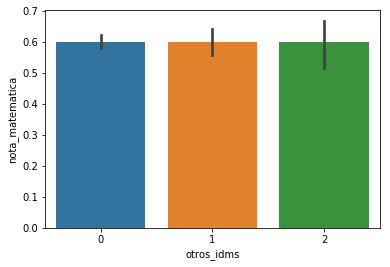

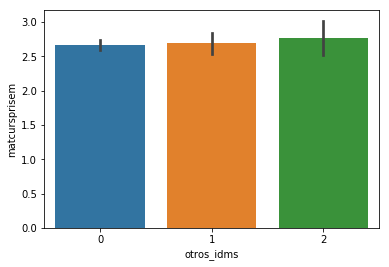

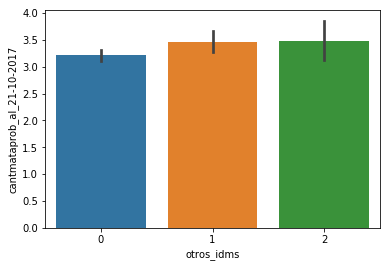

In [54]:
import seaborn as sns
ax = sns.barplot(x="otros_idms", y="nota_matematica", data=datos_null)
plt.show()
ax = sns.barplot(x="otros_idms", y="matcursprisem", data=datos_null)
plt.show()
ax = sns.barplot(x="otros_idms", y="cantmataprob_al_21-10-2017", data=datos_null)
plt.show()

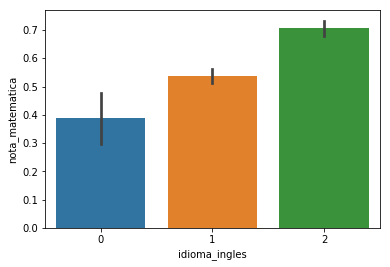

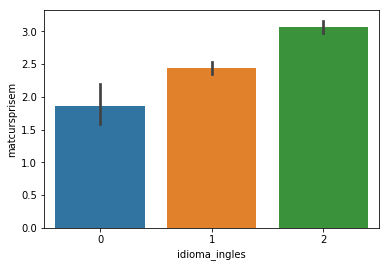

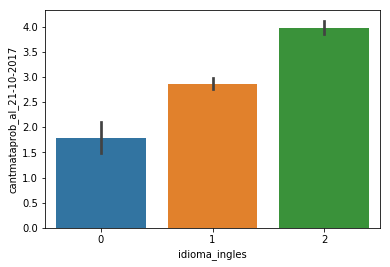

In [55]:
import seaborn as sns
ax = sns.barplot(x="idioma_ingles", y="nota_matematica", data=datos_null)
plt.show()
ax = sns.barplot(x="idioma_ingles", y="matcursprisem", data=datos_null)
plt.show()
ax = sns.barplot(x="idioma_ingles", y="cantmataprob_al_21-10-2017", data=datos_null)
plt.show()

No hay correlación entre saber otro idioma y las variables dependientes pero sí hay correlación con el nivel de inglés.

## Carrera

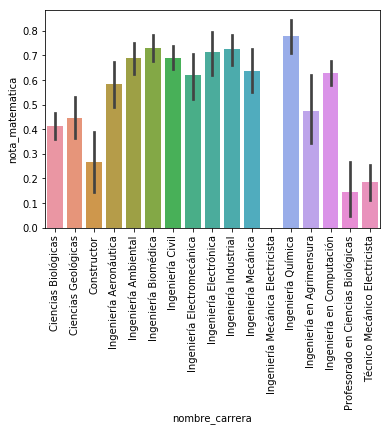

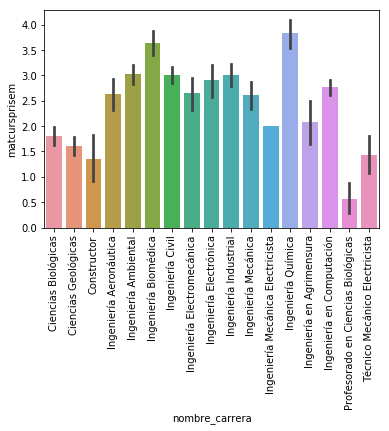

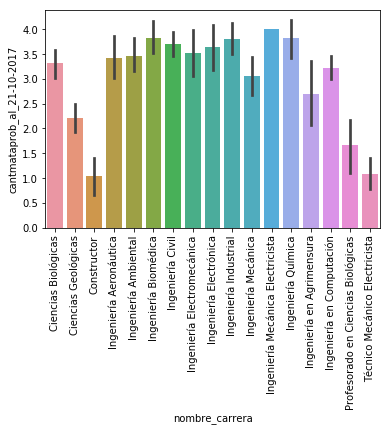

In [56]:
import seaborn as sns
ax = sns.barplot(x="nombre_carrera", y="nota_matematica", data=datos_null)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()
ax = sns.barplot(x="nombre_carrera", y="matcursprisem", data=datos_null)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()
ax = sns.barplot(x="nombre_carrera", y="cantmataprob_al_21-10-2017", data=datos_null)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

Hay diferencias entre las carreras. Se podría hacer un bloque con las ingenierías por un lado y un bloque con otras carreras que se dictan en la facultad (ciencias biológicas, profesorado en ciencias biológicas, ciencias geológicas, constructor, técnico mecánico electricista).

In [57]:
print(datos_null.isnull().sum())

nombre_carrera                                                                 0
sexo                                                                           0
obra_social                                                                    0
madre_trabajo                                                                  0
madre_vive                                                                     0
padre_trabajo                                                                  0
padre_vive                                                                     0
trabajo                                                                        0
horas_sem_trabajo                                                           2190
padre_ult_est_curs                                                             0
madre_ult_est_curs                                                             0
nota_matematica                                                                0
matcursprisem               

Conclusiones:

- De las variables que inspeccionamos, las que correlacionan con las variables que usamos para medir cómo llevan los estudiantes la carrera (nota matemática, materias cursadas primer semestre, materias aprobadas a la fecha) son: 
    * trabajo del alumno
    * obra social
    * madre_vive
    * padre_vive
    * madre_trabajo
    * padre_trabajo
    * madre_ult_estudios
    * padre_ult_estudios
    * idioma_ingles (nivel de inglés)
    * carrera
- No vemos dependencia con las variables:
    * sexo
    * deportes_practica
    * otros idiomas
- Las tres variables dependientes que analizamos se comportan igual o al menos de forma muy similar.
- Nos queda la inquietud de probar:
    * segmentar por carreras (a priori: ingenierias - otras). Habría que comparar también los planes de estudios.
    * generar una variable nueva que combine madre_vive padre_vive
    * generar una variable nueva que combien madre_trabajo padre_trabajo.
- Las variables se binarizaron, salvo carrera que se convirtió a numérica, idioma inglés que tiene 3 categorías ordinales

# CORRELACIONES ENTRE VARIABLES DEPENDIENTES

## Trabajo de los alumnos - madre_vive y padre_vive

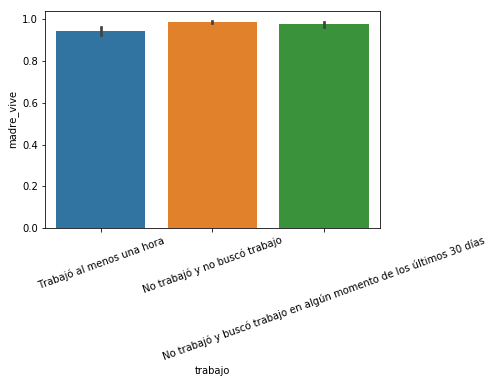

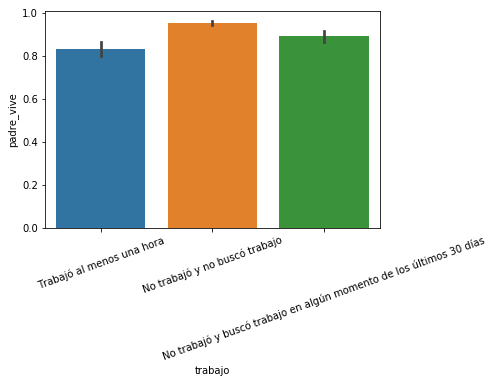

In [58]:
import seaborn as sns
ax = sns.barplot(x="trabajo", y="madre_vive", data=datos_null)
plt.setp(ax.get_xticklabels(), rotation=20)
plt.show()
ax = sns.barplot(x="trabajo", y="padre_vive", data=datos_null)
plt.setp(ax.get_xticklabels(), rotation=20)
plt.show()

Hay algo de correlación entre que el o la estudiante trabaje o busque trabajo y que su padre esté vivo. No se observa correlación con la madre

## Trabajo del alumno y trabajo del padre o madre

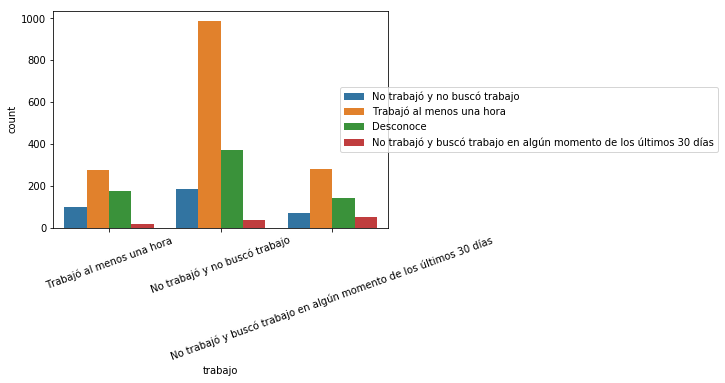

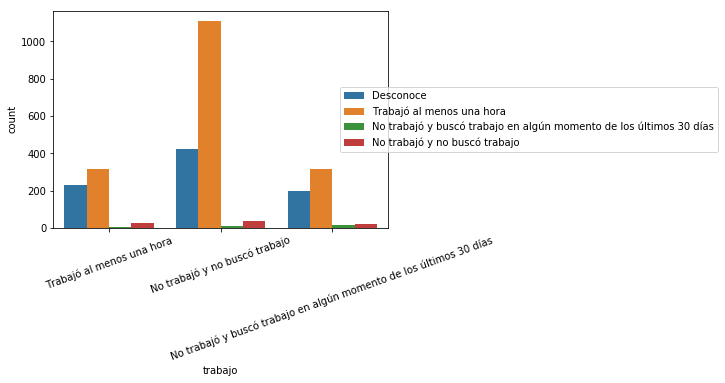

In [59]:
import seaborn as sns
ax = sns.countplot(x="trabajo", hue='madre_trabajo', data=datos_null)
plt.setp(ax.get_xticklabels(), rotation=20)
ax.legend(loc='right', bbox_to_anchor=(2, 0.5), ncol=1)
plt.show()
ax = sns.countplot(x="trabajo", hue='padre_trabajo', data=datos_null)
ax.legend(loc='right', bbox_to_anchor=(2, 0.5), ncol=1)
plt.setp(ax.get_xticklabels(), rotation=20)
plt.show()

Hay una fuerte correlación inversa entre que el alumno trabaje y su madre o padre trabajen

## Trabajo alumno y madre o padre ultimos estudios

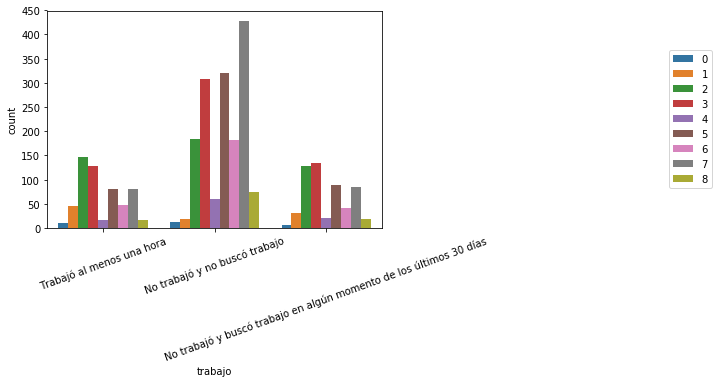

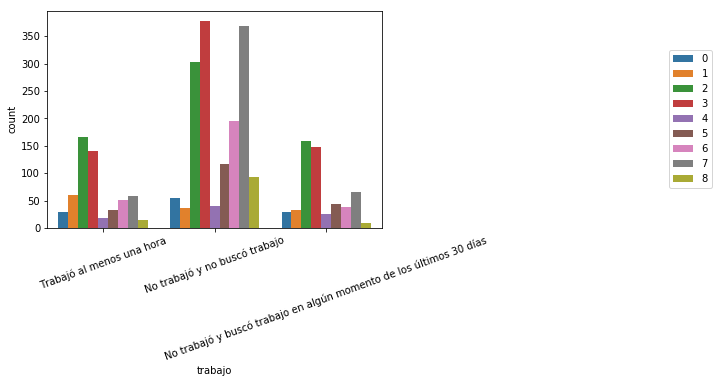

In [60]:
import seaborn as sns
ax = sns.countplot(x="trabajo", hue='estudios_madre', data=datos_null)
plt.setp(ax.get_xticklabels(), rotation=20)
ax.legend(loc='right', bbox_to_anchor=(2, 0.5), ncol=1)
plt.show()
ax = sns.countplot(x="trabajo", hue='estudios_padre', data=datos_null)
ax.legend(loc='right', bbox_to_anchor=(2, 0.5), ncol=1)
plt.setp(ax.get_xticklabels(), rotation=20)
plt.show()

Hay correlación entre que el alumno trabaje y el nivel de ultimos estudios cursados de padre/madre

## madre/padre trabajo y madre/padre ultimos estudios cursados

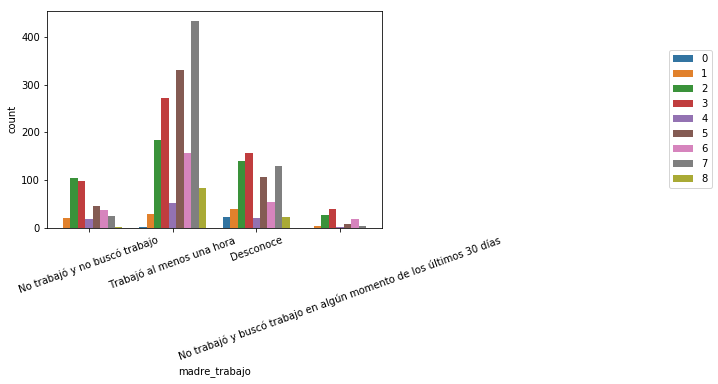

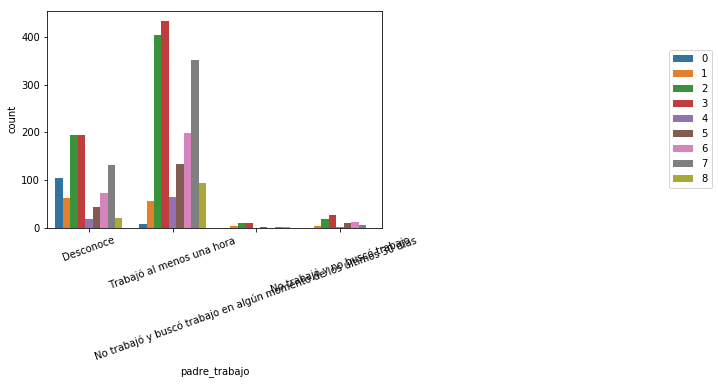

In [61]:
import seaborn as sns
ax = sns.countplot(x="madre_trabajo", hue='estudios_madre', data=datos_null)
plt.setp(ax.get_xticklabels(), rotation=20)
ax.legend(loc='right', bbox_to_anchor=(2, 0.5), ncol=1)
plt.show()
ax = sns.countplot(x="padre_trabajo", hue='estudios_padre', data=datos_null)
ax.legend(loc='right', bbox_to_anchor=(2, 0.5), ncol=1)
plt.setp(ax.get_xticklabels(), rotation=20)
plt.show()

Están correlacionadas y son muy similares a los gráficos anteriores donde mirábamos trabajo del alumno respecto a nivel de estudios de la madre y padre, solo que los grupos que se corresponden son = alumno no trabaja con madre/padre trabaja. 
Es decir que mayor nivel de estudios cursados de la madre/padre -> trabajo de la madre/padre -> alumno que no trabaja.

## Trabajo e ingles

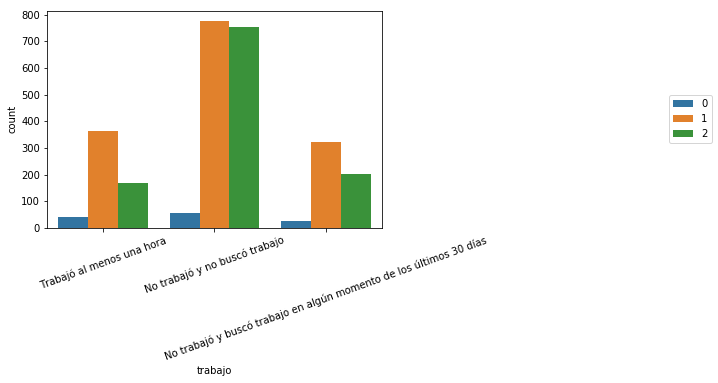

In [62]:
import seaborn as sns
ax = sns.countplot(x="trabajo", hue='idioma_ingles', data=datos_null)
plt.setp(ax.get_xticklabels(), rotation=20)
ax.legend(loc='right', bbox_to_anchor=(2, 0.5), ncol=1)
plt.show()

También hay correlación entre el nivel de inglés y que el alumne trabaje (o busque trabajo) o no trabaje.

## Trabajo y Carrera

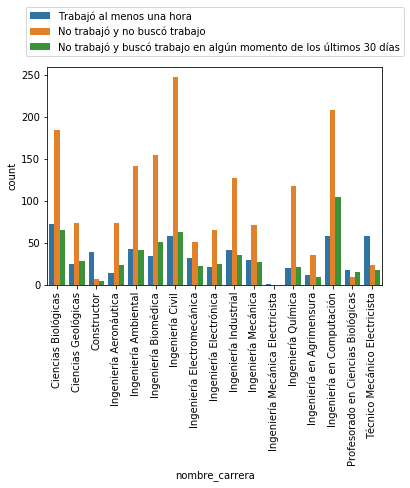

In [63]:
import seaborn as sns
ax = sns.countplot(x="nombre_carrera", hue='trabajo', data=datos_null)
plt.setp(ax.get_xticklabels(), rotation=90)
ax.legend(loc='upper center', bbox_to_anchor=(0.5,1.3), ncol=1)
plt.show()

De nuevo acá se ve una distribución desigual entre carreras. Técnico mecánico electricista, Profesorado en biología, constructor, tienen mucha mayor proporción de estudiantes que trabajan, respecto de otras carreras. También en función de esto se podría comparar los planes de estudio y segmentar quizás en tres: ingenierías, ciencias biológicas y geológicas, técnicos y profesorado.

Conclusiones:

- Hay correlación entre nivel de estudios de la madre y padre, trabajo de la madre y padre, y trabajo del alumno. Es decir que mayor nivel de estudios cursados de la madre/padre -> mayor proporción de madre/padre que trabajan -> mayor proporción de alumnos que no trabajan. Eso significa que estas variables independientes no son independientes entre sí. Aportan en buena medida la misma información.
- Hay correlación negativa entre el nivel de inglés y que el alumno trabaje (mayor nivel de inglés correlaciona con que el alumno no trabaje).
- No hay correlación entre que el alumno trabaje y que su padre/madre esté vivo.
- Hay diferencias entre alumnos trabajadores y no entre las distintas carreras.